load the libraries

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, TruncatedSVD

loading the data

In [244]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [245]:
df = pd.DataFrame(data.data, columns = data.feature_names)


In [246]:
y = pd.DataFrame(data.target)

In [247]:
y.shape

(569, 1)

In [248]:
df.shape

(569, 30)

In [249]:
df.head

<bound method NDFrame.head of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean conca

In [250]:
y.shape

(569, 1)

In [251]:
scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

Linear Regression Model without Dimensionality Reduction

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [253]:
lr = LinearRegression()

# Train the model
model = lr.fit(X_train, y_train)

# Prediction
y_pred =  lr.predict(X_test)

# Accuracy Score
lr.score(X_test, y_test).round(4)

0.7128

Linear Regression Model with PCA

In [254]:
pca = PCA(n_components = 10, whiten = True)
pca.fit(X)
pca_X = pca.transform(X)

In [255]:
pca_X.shape

(569, 10)

In [256]:
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_X, y, test_size = 0.2, random_state = 4)

In [257]:
pca_lr = LinearRegression()

# Train the model
pca_model = pca_lr.fit(pca_X_train, pca_y_train)

# Prediction
pca_y_pred =  pca_lr.predict(pca_X_test)

# Accuracy Score
pca_lr.score(pca_X_test, pca_y_test).round(4)

0.6949

Linear Regression Model with SVD

In [258]:
svd = TruncatedSVD(n_components = 10)
svd.fit(X)
svd_X = pca.transform(X)

In [259]:
svd_X_train, svd_X_test, svd_y_train, svd_y_test = train_test_split(svd_X, y, test_size = 0.2, random_state = 4)

In [260]:
svd_lr = LinearRegression()

# Train the model
svd_model = svd_lr.fit(svd_X_train, svd_y_train)

# Prediction
pca_y_pred =  svd_lr.predict(svd_X_test)

# Accuracy Score
svd_lr.score(svd_X_test, svd_y_test).round(4)

0.6949

Thus, we can see how the accuracy is almost close to the data that has many features(without PCA) compared to the PCA and SVD

Text(0, 0.5, 'Second principle component')

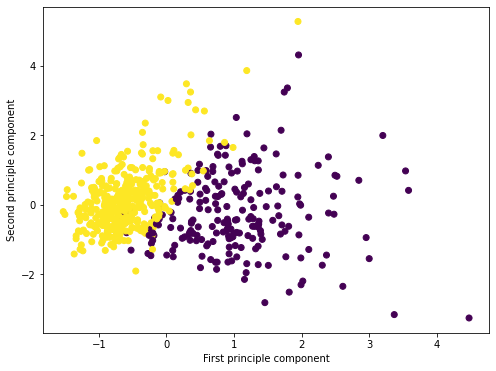

In [261]:
plt.figure(figsize=(8,6))
plt.scatter(pca_X[:,0],pca_X[:,1],c=data['target'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')